# communicating results 
- Visuals can be used to efficiently communicate conclusions drawn from your analysis
- in this notebook, notice the labeling, color, size, and data selection arguments for histograms, bar charts, and pie charts in the examples

In [2]:
import pandas as pd

df = pd.read_csv("census_income_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## let's separate the people who make above $50k and below $50k

In [6]:
df["income"].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [21]:
df["income"][0]

' <=50K'

- we notice that there is a space before the value in the column, so we will remove it

In [22]:
df["income"] = df["income"].map(lambda x: x[1:])

In [23]:
df_a = df[df["income"] == ">50K"]
df_b = df[df["income"] == "<=50K"]

In [24]:
df_a.shape, df_b.shape

((7841, 15), (24720, 15))

### what is the difference between the two groups in terms of the education level?
- and since educations is a categorical variable, we will use `value_counts` to get the count of each category in the two groups

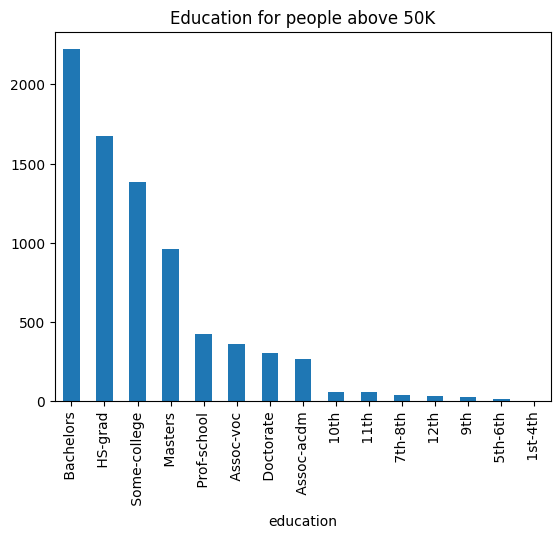

In [30]:
df_a["education"].value_counts().plot(kind="bar", title="Education for people above 50K");

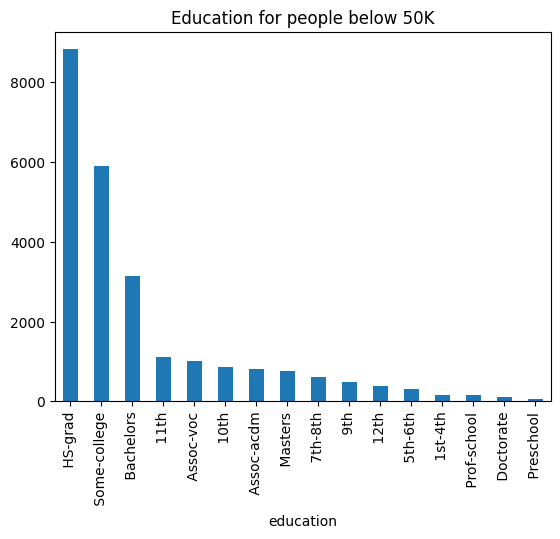

In [31]:
df_b["education"].value_counts().plot(kind="bar", title="Education for people below 50K");

- notice that the labels of the 2 groups are sorted in descending order, but we need to make them consistent in the 2 groups so that we can compare them
    - we will use the index of one of them to sort both of them
- we will do that simply using `df[idx]` where `idx` is an index of some dataframe
    - in general we can sort the columns by having a list of the columns in the desired order and then use `df[cols]` 

In [33]:
idx = df_a["education"].value_counts().index
idx

Index([' Bachelors', ' HS-grad', ' Some-college', ' Masters', ' Prof-school',
       ' Assoc-voc', ' Doctorate', ' Assoc-acdm', ' 10th', ' 11th', ' 7th-8th',
       ' 12th', ' 9th', ' 5th-6th', ' 1st-4th'],
      dtype='object', name='education')

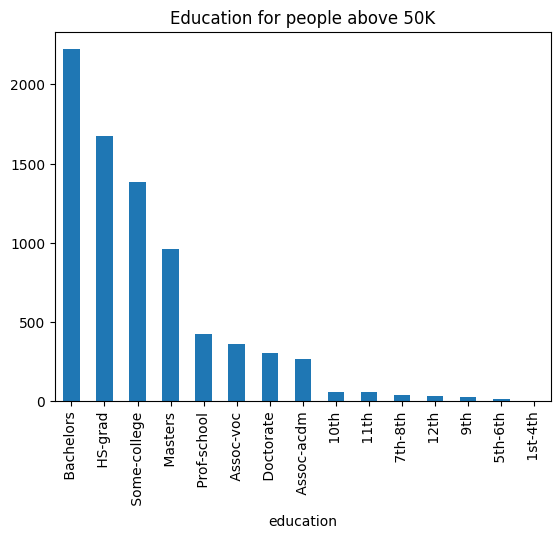

In [34]:
df_a["education"].value_counts()[idx].plot(kind="bar", title="Education for people above 50K",);

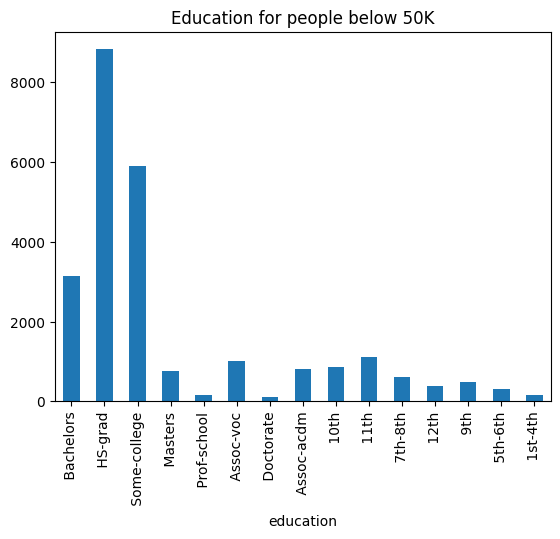

In [35]:
df_b["education"].value_counts()[idx].plot(kind="bar", title="Education for people below 50K");

## what workclasses dominate in each group?

In [37]:
df_a["workclass"].value_counts()

workclass
 Private             4963
 Self-emp-not-inc     724
 Self-emp-inc         622
 Local-gov            617
 Federal-gov          371
 State-gov            353
Name: count, dtype: int64

In [38]:
idx = df_a["workclass"].value_counts().index
idx

Index([' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Local-gov',
       ' Federal-gov', ' State-gov'],
      dtype='object', name='workclass')

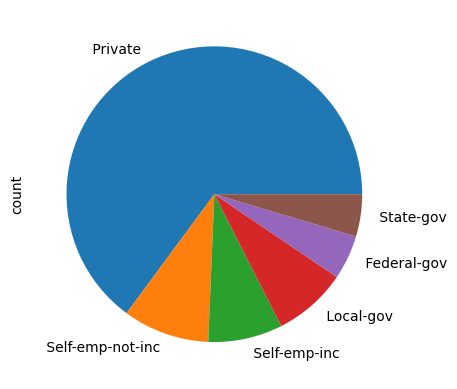

In [41]:
df_a["workclass"].value_counts()[idx].plot(kind="pie", title="workclass of rich people");

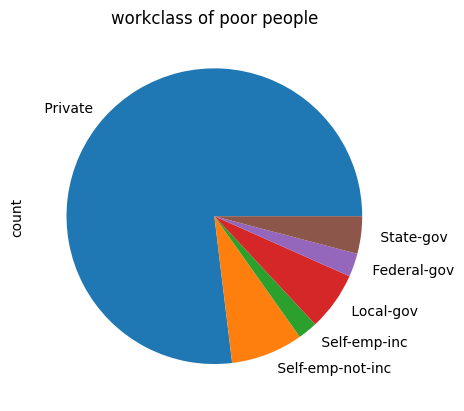

In [42]:
df_b["workclass"].value_counts()[idx].plot(kind="pie", title="workclass of poor people");

## what is the age distribution in each group?

In [50]:
df_a["age"].mean(), df_b["age"].mean()

(44.24984058155847, 36.78373786407767)

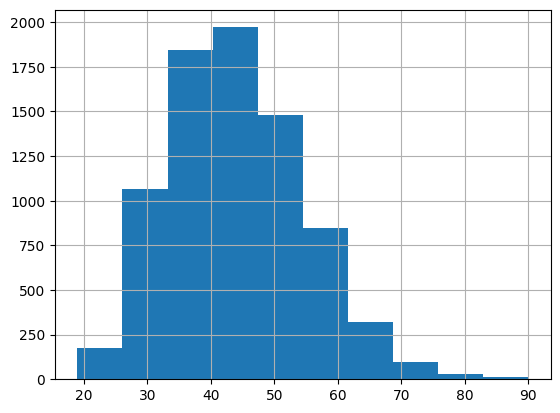

In [46]:
df_a["age"].hist();

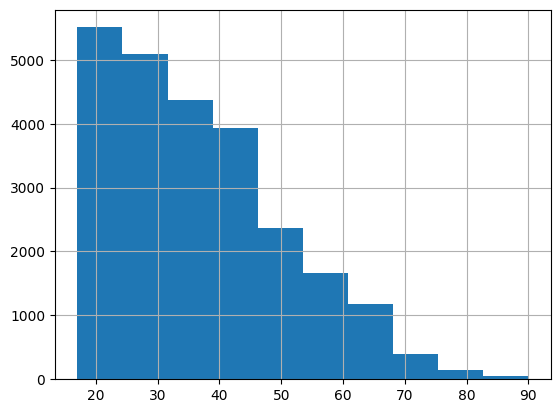

In [48]:
df_b["age"].hist();

- the people who make more than 50K seem to be older 